In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## About the Dataset
Fro survival analysis in lung cancer, a commonly used dataset is the lung cancer survival dataset. we will use this dataset to model survival probabilities. The data includes several features such as:
1. Time: The survival time or time until death (in days).
2. Status: Censoring indicator (1= death, 0= censored)
3. Age: The patient's age at the time of diagnosis
4. Sex: Gender (1= male, 2= female)
5. ph.ecog: ECOG performance score (a measure of patient's daily functioning)
6. meal.ca: Calories consumed per day
7. wt.loss: Weight loss (in kgs) over the preceding 6 months

In [4]:
data=pd.read_csv("C:/Users/user1/Desktop/cancer.csv")
data["status"]=data["status"]-1

In [6]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


## Checking for Null values in the dataset

In [9]:
data.isnull().sum()

Unnamed: 0     0
inst           1
time           0
status         0
age            0
sex            0
ph.ecog        1
ph.karno       1
pat.karno      3
meal.cal      47
wt.loss       14
dtype: int64

#### We wont use these Variables in our analysis so we drop them

In [13]:
data.drop(["Unnamed: 0","inst"],axis=1,inplace=True)

In [15]:
data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,883,1,60,1,0.0,100.0,90.0,NaN,0.0


### Handling missing values
In this analysis I encountered some missing values in the dataset, To handle them, I decided to replace the null values with the **Mean** value of the respective column.
This approach helps in minimizing Bias and ensure that the dataset remains usable for further analysis, especially in predictive modeling or statistical analysis such as survival analysis

In [18]:
data["meal.cal"]=round(data["meal.cal"].fillna(data['meal.cal'].mean()),2)
data["wt.loss"]=round(data["wt.loss"].fillna(data['wt.loss'].mean()),2)   


In [20]:
data

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,306,1,74,1,1.0,90.0,100.0,1175.00,9.83
1,455,1,68,1,0.0,90.0,90.0,1225.00,15.00
2,1010,0,56,1,0.0,90.0,90.0,928.78,15.00
3,210,1,57,1,1.0,90.0,60.0,1150.00,11.00
4,883,1,60,1,0.0,100.0,90.0,928.78,0.00
...,...,...,...,...,...,...,...,...,...
223,188,0,77,1,1.0,80.0,60.0,928.78,3.00
224,191,0,39,1,0.0,90.0,90.0,2350.00,-5.00
225,105,0,75,2,2.0,60.0,70.0,1025.00,5.00
226,174,0,66,1,1.0,90.0,100.0,1075.00,1.00


## Survival analysis Using Km- Estimate and NA- Estimate

### KaplanMeier Estimate
We will use the **Kaplan-Meier Estimate** to perform The Survival analysis, it is used to estimate the survival function from lifetime data and is widely used in medical research to model patients survival over time
Below are codes to import and use KM estimator

In [24]:
from lifelines import KaplanMeierFitter

In [26]:
## After importing the KM estimate, the next step is to instantiate the KM fitter and fit the survival data
kmf=KaplanMeierFitter()

In [28]:
#fitting The survival data
kmf.fit(data['time'], data['status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

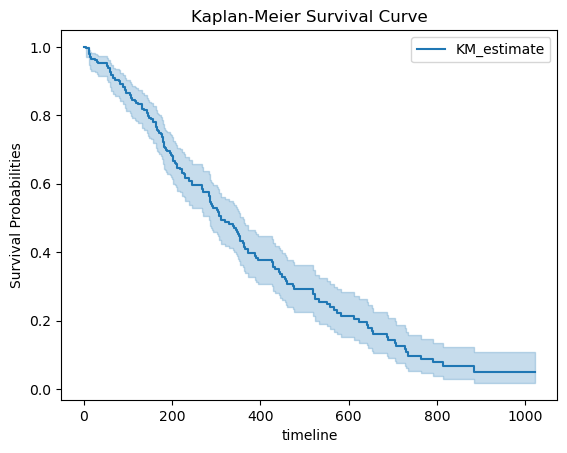

In [30]:
## Ploting the KM survival curve
plt.xlabel("Timelines")
plt.ylabel("Survival Probabilities")
plt.title("Kaplan-Meier Survival Curve")
kmf.plot()
plt.show()

### Event table
After fitting the KM model to the survival data, we can plot the event table to provide insights into the nurmber of individual at risk, the number of events occoured, and the censored number at each time point

In [33]:
event_table=kmf.event_table
print("Event_table")
event_table.head(10)

Event_table


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
15.0,1,1,0,0,221
26.0,1,1,0,0,220
30.0,1,1,0,0,219
31.0,1,1,0,0,218


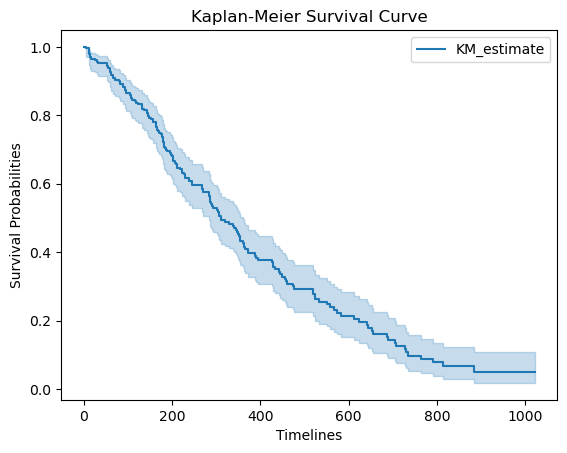

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [37]:
kmf.plot_survival_function()
plt.xlabel("Timelines")
plt.ylabel("Survival Probabilities")
plt.title("Kaplan-Meier Survival Curve")
plt.show()
kmf.event_table

### Predicting Survival at specific time points
Once we have fitted the KMS we can now predict survival probabilities at specific time points. This is useful for estimating the probability that a subject will survive beyond certain time periods

In [100]:
time_points=[1,20,40,65,90,125,230,335,440,545,650]
Survival_probabilities=kmf.predict(time_points)
Survival_probabilities

for t, Survival_prob in zip(time_points,Survival_probabilities):
    print(f"Survival probability at time {t}: = {Survival_prob:.4f}")

Survival probability at time 1: = 1.0000
Survival probability at time 20: = 0.9649
Survival probability at time 40: = 0.9518
Survival probability at time 65: = 0.9079
Survival probability at time 90: = 0.8816
Survival probability at time 125: = 0.8246
Survival probability at time 230: = 0.5395
Survival probability at time 335: = 0.3465
Survival probability at time 440: = 0.2237
Survival probability at time 545: = 0.1404
Survival probability at time 650: = 0.0877


### Cumulative Density Plot
The **Cumulative Density Function (CDF)** represents the probability that the event has occured by a certain time point. It is a comliment of the survival function

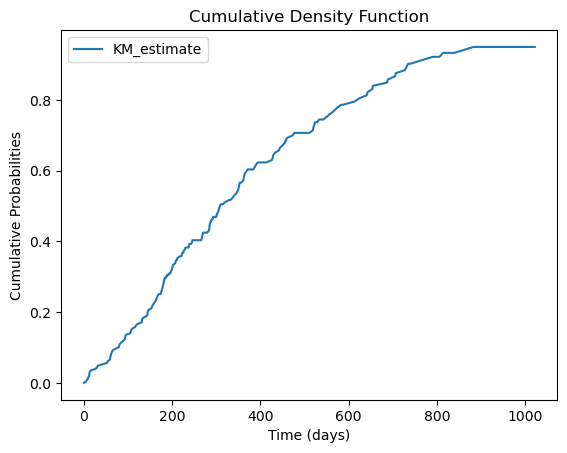

In [45]:
kmf.cumulative_density_.plot()
plt.xlabel("Time (days)")
plt.ylabel("Cumulative Probabilities")
plt.title("Cumulative Density Function")
plt.show()

## Nelson- Aalen Estimate
The **Nelson Aalen Estimate** is used to estimate the cumulative hazard function whhich provides the total amount of risk accumulated over time. it compliments the Kaplan-meier estimator, which focus on survival probabilities. 
The cumulative hazard function helps to model the risk of the event happening at each time point.

In [48]:
from lifelines import NelsonAalenFitter

In [50]:
na=NelsonAalenFitter()

In [52]:
na.fit(data['time'], data['status'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 228 total observations, 63 right-censored observations>

<Axes: xlabel='timeline'>

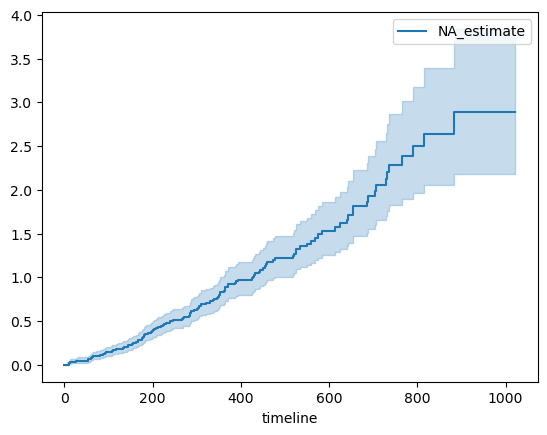

In [65]:
na.plot_cumulative_hazard()

In [155]:
from lifelines import CoxPHFitter

In [157]:
cph=CoxPHFitter()

In [185]:
data=data.dropna()

In [187]:
cph.fit(data, duration_col='time',event_col='status')

<lifelines.CoxPHFitter: fitted with 223 total observations, 0 right-censored observations>

In [193]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,0.000886,1.000887,0.008018,-0.014828,0.016601,0.985281,1.016739,0.0,0.110528,0.911990,0.132910
sex,-0.227814,0.796272,0.139780,-0.501779,0.046151,0.605453,1.047232,0.0,-1.629798,0.103144,3.277267
ph.ecog,0.459451,1.583205,0.161784,0.142360,0.776542,1.152992,2.173942,0.0,2.839904,0.004513,7.791789
ph.karno,0.017109,1.017256,0.008609,0.000235,0.033982,1.000235,1.034566,0.0,1.987305,0.046889,4.414619
pat.karno,-0.011168,0.988895,0.006070,-0.023064,0.000729,0.977200,1.000729,0.0,-1.839842,0.065791,3.925957
meal.cal,-0.000038,0.999962,0.000214,-0.000457,0.000381,0.999543,1.000381,0.0,-0.179265,0.857730,0.221405
wt.loss,-0.008393,0.991642,0.005653,-0.019472,0.002687,0.980716,1.002691,0.0,-1.484631,0.137642,2.861012


<Axes: xlabel='log(HR) (95% CI)'>

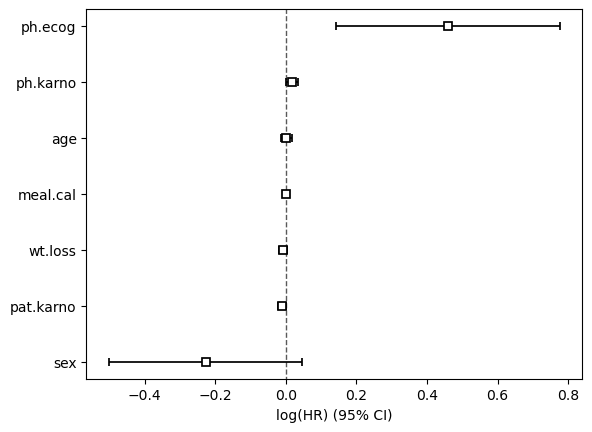

In [195]:
cph.plot()